## Fit the model/algorithm to the data and use it to make predictions 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Fit the model to the data

In [2]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Split the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [4]:
# Let's use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Evaluate the model
rfc.score(X_test, y_test)

0.8524590163934426

If you'd like to learn more about the Random Forest and why it's the war horse of machine learning, check out these resources:

- [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Random Forests in Python by yhat](http://blog.yhat.com/posts/random-forests-in-python.html)
- [An Implementation and Explanation of the Random Forest in Python by Will Koehrsen](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76)

### 2. Make predictions using machine learning model

2 ways to make predictions
- `predict()`
- `predict_proba()`

In [5]:
# Compare predictions to truth labels to evaluate the model
y_preds = rfc.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [6]:
rfc.score(X_test, y_test)

0.8524590163934426

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [8]:
# make predictions using predict_proba
# it returns a probability  of classification labels
rfc.predict_proba(X_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [9]:
rfc.predict(X_test)[:5]

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [10]:
from sklearn.datasets import load_boston
boston_data = load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
boston_df = pd.DataFrame(boston_data["data"],
                         columns=boston_data["feature_names"])
boston_df["target"] = pd.Series(boston_data["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# Split the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Evaluate the model
rfr.score(X_test, y_test)

0.8654448653350507

In [14]:
y_preds = rfr.predict(X_test)
y_preds[:5]

array([23.081, 30.574, 16.759, 23.46 , 16.893])

[Formula](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.score)

In [15]:
# Compare the predictions to the truth
from sklearn.metrics import mean_squared_error

u = mean_squared_error(y_test, y_preds)
mean_array = np.empty_like(y_test)
mean_array.fill(y_test.mean())
v = mean_squared_error(y_test, mean_array)
print(1 - u/v)

0.8654448653350507


### 3. Evaluating a machine learning model

3 ways to evaluate Scikit-Learn  models/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions
    
#### 3.1 Evaluating a model with the score method   

In [16]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier().fit(X_train, y_train)


In [17]:
rfc.score(X_train, y_train)

1.0

In [18]:
rfc.score(X_test, y_test)

0.8524590163934426

In [19]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr = RandomForestRegressor().fit(X_train, y_train)


In [20]:
rfr.score(X_train, y_train)

0.9763520974033731

In [21]:
rfr.score(X_test, y_test)

0.8654448653350507

**Remember, even if both models are using the same `score` function, they are using different formulas underlying.**

#### 3.2 Evaluating a model with the `scoring` paramter

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier().fit(X_train, y_train)

In [23]:
clf.score(X_test, y_test)

0.8524590163934426

In [24]:
# remember we call cross_val_score on original X an y
# we do not need to split the data
# default is 5-fold validation
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [25]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [26]:
np.random.seed(42)

# Single training and test split score
single_split_score = clf.score(X_test, y_test)

# Mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
single_split_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [27]:
# scoring parameter is set to none by default
# it then uses default evaluation metric of the classifier
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
accuracy = cross_val_score(clf, X, y, cv=5)
print(f"Heart Disease Classifier Accuracy {np.mean(accuracy)*100:.2f} %")

Heart Disease Classifier Accuracy 82.48 %


**Area under the receiver operating characteristic curve (AUC/ROC)**
- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when real label is 1
* False positive = model predicts 1 when real label is 0
* True nefative = model predicts 0 when real label is 0
* False nefative = model predicts 1 when real label is 0


In [29]:
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [30]:
y_probs_positives = y_probs[:, 1]
y_probs_positives[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [31]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positives)

# Check the fpr
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

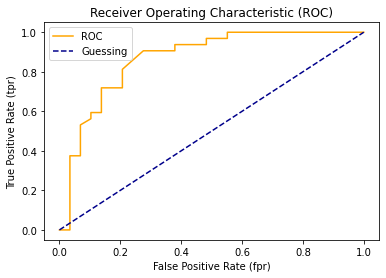

In [32]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots ROC given the false positive rate (fpr) and true positive rate(tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positives)

0.8669181034482759

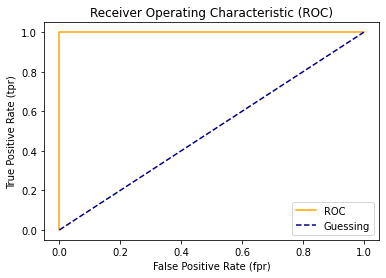

In [34]:
# Plot perfect ROC curve and AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [35]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### ROC Curve + AUC

When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

For more information on these metrics, bookmark the following resources and refer to them when you need:

1. [ROC and AUC, Clearly Explained! by StatQuest](https://www.youtube.com/watch?v=4jRBRDbJemM)

2. [ROC documentation in Scikit-Learn (contains code examples)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

3. [How the ROC curve and AUC are calculated by Google's Machine Learning team](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

### Confusion Matix

A confusion matrix is quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you the idea of where the model is getting confused.

In [44]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

conf_mat = confusion_matrix(y_preds, y_test)
conf_mat

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [51]:
# Visualize confusion matric with pd.crosstab()
pd.crosstab(y_test, y_preds, 
            rownames=["Actual labels"],
            colnames=["Predicted labels"])

Predicted labels,0,1
Actual labels,,
0,23,6
1,6,26


**Matrix**
```
[TP, FP]
[FN, TN]
```

<AxesSubplot:>

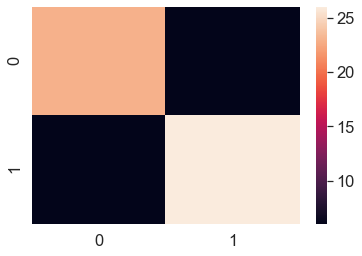

In [49]:
# Make our confusion matric with seaborn's heatmap()
import seaborn as sns

# set font scale
sns.set(font_scale=1.5)

sns.heatmap(conf_mat)

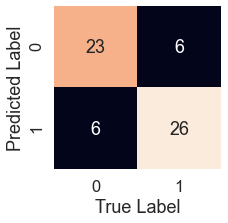

In [50]:
def plot_conf_mat(conf_mat):
    """
    Plot confusion matric using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                    annot= True, # Annotate the boxes with conf_mat info
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    
plot_conf_mat(conf_mat)

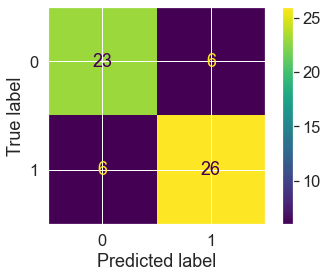

In [53]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test)

**Classification Report**

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [62]:
# where precision and recall becomes valuable
disease_true = np.zeros(1000)
disease_true[0] = 1
disease_preds = np.zeros(1000)

print(classification_report(disease_preds, disease_true))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1000
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       1.00      1.00      1.00      1000



C:\miniconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\miniconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\miniconda3\envs\ML\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### To summarize classification matrix

- **Accuracy** is a good measure to start with if all classes are balanced(e.g. same amount of smaples whcih are labelled 0 or 1)
- **Precision** and **Recall** become more important when classes are imbalanced.
- If false positive predictions are worse then false negative, aim for higher precision
- If false negative predictions are worse then false positive, aim for higher recall
- **F-1 score** is a combination of precision and recall


### Regression model evaluation metrics

Model evaluation metrics https://scikit-learn.org/stable/modules/model_evaluation.html

1. **R^2 (r-squared) or coefficient of determination**
    - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. 
    - For example, if all your model does is predicts the mean of the targets, its R^2 value would be 0. and if your model perfectly predicts a range of numbers it's R^2 value would be 1.
2. **Mean absolute error (MAE)**
    - MAE is the average of the absolute differences between predictions and actual values. It gives you an estimate of how wrong your model's predictions are.
3. **Mean squared error (MSE)**
    - MSE will always be higher than MAE. MSE is the average of the square of differences between predictions and actual values.

**R^2 error**

In [66]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
model.score(X_test, y_test)

0.8654448653350507

In [68]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [69]:
r2_score(y_test, y_test_mean) 

0.0

In [70]:
r2_score(y_test, y_test)

1.0

**Mean absolute error**

In [72]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [76]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean squared error**

In [78]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [81]:
# calaulate MSE by hand
np.mean(np.square(df["differences"]))

9.867437068627442

### Classification Model Evaluation Metrics/Techniques

- **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

- [**Precision**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

- [**Recall**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

- [**F1 score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

- [**Confusion matrix**](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

- [**Cross-validation**](https://scikit-learn.org/stable/modules/cross_validation.html) - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

- [**Classification report**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

- [**ROC Curve**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_score.html) - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

- [**Area Under Curve (AUC) Score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

### Which classification metric should you use?

- **Accuracy** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

- **Precision** and **recall** become more important when classes are imbalanced.

- If false-positive predictions are worse than false-negatives, aim for higher precision.

- If false-negative predictions are worse than false-positives, aim for higher recall.

- **F1-score** is a combination of precision and recall.

- A confusion matrix is always a good way to visualize how a classification model is going.

### Regression Model Evaluation Metrics/Techniques

- [**R^2 (pronounced r-squared) or the coefficient of determination**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

- [**Mean absolute error (MAE)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

- [**Mean squared error (MSE)**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

### Which regression metric should you use?

- **R2** is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your **R2** value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

- **MAE** gives a better indication of how far off each of your model's predictions are on average.

- As for **MAE** or **MSE**, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

    - Pay more attention to MAE: When being \\$10,000 off is **twice** as bad as being \\$5,000 off.
    - Pay more attention to MSE: When being \\$10,000 off is **more than twice** as bad as being $5,000 off.

#### For more resources on evaluating a machine learning model, be sure to check out the following resources:

- [Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)](https://scikit-learn.org/stable/modules/model_evaluation.html)

- [Beyond Accuracy: Precision and Recall by Will Koehrsen](https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c)

- [Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)](https://stackoverflow.com/a/37861832)

### Finally using the scoring paramter

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()


In [91]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [93]:
# Cross-validated accuracy
print(f"The cross validated accuracy is {np.mean(cv_acc)*100:0.2f} %")

The cross validated accuracy is 82.48 %


In [95]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross validated accuracy is {np.mean(cv_acc)*100:0.2f} %")

The cross validated accuracy is 82.48 %


In [97]:
cv_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross validated precision is {np.mean(cv_prec)*100:0.2f} %")

The cross validated precision is 80.86 %


In [98]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross validated recall is {np.mean(cv_recall)*100:0.2f} %")

The cross validated recall is 84.24 %


In [99]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross validated f1 is {np.mean(cv_f1)*100:0.2f} %")

The cross validated f1 is 84.15 %


**How about out regression model ?**

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

rfr = RandomForestRegressor()

In [103]:
np.random.seed(42)
cv_acc = cross_val_score(rfr, X, y, cv=5)
print(f"The cross validated accuracy is {np.mean(cv_acc)*100:0.2f} %")

The cross validated accuracy is 62.44 %


In [105]:
np.random.seed(42)
cv_r2 = cross_val_score(rfr, X, y, cv=5, scoring="r2")
print(f"The cross validated r2 is {np.mean(cv_r2)*100:0.2f} %")

The cross validated r2 is 62.44 %


In [114]:
np.random.seed(42)
cv_mae = cross_val_score(rfr, X, y, cv=5, scoring="neg_mean_absolute_error")
print(f"The cross validated mae is {np.mean(cv_mae):0.2f} ")

The cross validated mae is -3.03 


In [115]:
np.random.seed(42)
cv_mse = cross_val_score(rfr, X, y, cv=5, scoring="neg_mean_squared_error")
print(f"The cross validated mse is {np.mean(cv_mse):0.2f} ")

The cross validated mse is -21.26 


### 3.3 Problem Specific metric functions, using sklearn metric functions

**Classification evaluation functions**

In [120]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit a model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict
y_preds = clf.predict(X_test)

# Evaluate the model
print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f} %")
print(f"Precision: {precision_score(y_test, y_preds)*100:.2f} %")
print(f"Recall: {recall_score(y_test, y_preds)*100:.2f} %")
print(f"F1: {f1_score(y_test, y_preds)*100:.2f} %")

Classifier metrics on the test set
Accuracy: 85.25 %
Precision: 84.85 %
Recall: 87.50 %
F1: 86.15 %


**Regression evaluation functions**

In [126]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit a model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Predict
y_preds = rfr.predict(X_test)

# Evaluate the model
print("Regressor metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)*100:.2f} %")
print(f"MAE: {mean_absolute_error(y_test, y_preds):.2f} ")
print(f"mse: {mean_squared_error(y_test, y_preds):.2f} ")


Regressor metrics on the test set
R^2: 86.54 %
MAE: 2.14 
mse: 9.87 
